In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [6]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [52]:
y = pd.DataFrame(boston.target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
import pandas as pd
df = pd.DataFrame(boston['data'], columns=boston.feature_names)

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Creating and Training the Model

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## Train Test Data Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

## Train Model

In [21]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Coefficients

In [24]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [35]:
df_coef = pd.DataFrame(lm.coef_.transpose(), index=X_train.columns, columns=['coefficients'])

In [36]:
df_coef

,coefficients
CRIM,-0.128750
ZN,0.037823
INDUS,0.058211
CHAS,3.238668
NOX,-16.169812
RM,3.902051
AGE,-0.012851
DIS,-1.422224
RAD,0.234854
TAX,-0.008213


## Predictions using model

In [37]:
predictions = lm.predict(X_test)

## Visual Analysis

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

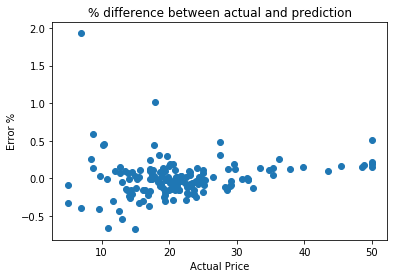

In [61]:
diff = (y_test - predictions) / y_test
# print(diff)
plt.scatter(y_test, diff)
plt.xlabel('Actual Price')
plt.ylabel('Error %')
plt.title('% difference between actual and prediction' )
plt.show()
